In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
5000
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [73]:
def predict_train(input_str, letters, max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}
    HW: dict[str, int] = {}
    W: dict[str, dict[str, int]] = {}

    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)
    
    prev_index = 0

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            WIN[inp][prev_index] += 1
            continue
        
        IDX.append(prev_index)

        prev_idx = inp_idx - 1
        prev_inp = input_str[prev_idx]

        key_HW = prev_inp + str(prev_index) + ':' + inp

        inp_min_index = 0
        if HW.get(key_HW, -1) != -1:
            inp_min_index = HW[key_HW]
        else:
            inp_min_index = min(WIN[inp], key=WIN[inp].get)
            WIN[inp][inp_min_index] += 1

            HW.setdefault(key_HW, inp_min_index)

        key_I = prev_inp + str(prev_index)
        key_O = inp + str(inp_min_index)
        W.setdefault(key_I, {})
        W[key_I].setdefault(key_O, 0)
        W[key_I][key_O] += 1

        # recursion
        prev_index = inp_min_index
    
    return W, HW, IDX

W, HW, IDX = predict_train(input_str, letters, max_index=4)
for wk, wv in W.items():
    print(wk, wv)

c0 {'h0': 2, 'k0': 2, 'e2': 5, 'i2': 1}
h0 {'a0': 3, ' 0': 7, 'i2': 2, 't1': 4, 'y2': 2, 'o0': 1, 'e3': 1, 'r3': 1}
a0 {'p0': 2, 'r1': 6, 'm1': 5, 's1': 6, 'n3': 4, 't1': 1, 'l2': 5, 'c0': 2, 'w3': 2, 'i0': 3}
p0 {'t0': 1, ' 2': 1, 'i3': 1, 's1': 1, 'l0': 3, 'u1': 2, 'p1': 1}
t0 {'e0': 2, 'o1': 5, 'h3': 31, ' 3': 33, 't1': 6, 'i2': 4, 'r2': 1, 's0': 1, 'a0': 1, 'u3': 1}
e0 {'r0': 8, ' 3': 29, 's1': 6, 'd0': 8, 't2': 7, 'n2': 8, 'l1': 1, "'3": 1, 'b2': 1, 'y0': 4, 'w1': 1, 'e1': 1}
r0 {' 0': 22, 'e3': 15, 'o3': 12, 'h0': 1, 'i2': 2, 's0': 2, 't1': 6, 'a3': 5, 'd1': 1}
 0 {'i0': 19, 'a2': 22, 'b0': 21, 'c3': 11, 'h3': 13, 'r0': 18, 'k1': 3, 't0': 30, 'w1': 14, 'o0': 12, 'f3': 7, 'n2': 5, 's2': 21, 'd2': 4, 'p2': 13, 'y2': 2, 'm2': 7, 'e2': 4, 'g1': 4, 'l1': 7, 'u3': 2, "'2": 1, 'v0': 1, 'q2': 1, 'j2': 2}
i0 {'n0': 24, 'e1': 3, 'r2': 8, 's0': 27, ' 0': 18, 'd3': 10, 't0': 14, 'k1': 5, "'1": 1, 'l1': 1, 'm3': 5, 'f1': 4, 'v0': 1, 'g1': 1}
n0 {' 1': 20, 't1': 5, 'd3': 24, 'o0': 6, "'0": 4, 

In [74]:
def get_TF(input_str: str, W: dict[str, dict[str, int]], IDX: list):
    TF = []

    for inp_idx, inp in enumerate(input_str[:-1]):
        index = IDX[inp_idx]

        key_I = inp + str(index)
        I = W[key_I]

        tf = len(I)

        TF.append(tf)
    
    return TF

TF = get_TF(input_str, W, IDX)
print(TF)

[4, 8, 10, 7, 10, 12, 9, 25, 14, 13, 23, 8, 6, 13, 5, 6, 21, 6, 14, 23, 12, 13, 15, 25, 14, 13, 9, 8, 15, 8, 9, 6, 15, 6, 23, 10, 12, 21, 6, 12, 14, 9, 8, 12, 23, 9, 7, 14, 23, 8, 14, 15, 8, 25, 17, 11, 7, 23, 9, 15, 3, 15, 25, 8, 15, 12, 5, 21, 13, 13, 5, 23, 9, 7, 14, 23, 11, 10, 12, 8, 14, 14, 5, 25, 8, 15, 4, 13, 14, 23, 6, 15, 9, 15, 21, 12, 9, 23, 12, 8, 6, 10, 13, 6, 23, 4, 14, 12, 13, 25, 7, 14, 6, 8, 9, 4, 23, 7, 15, 4, 11, 5, 9, 17, 14, 8, 11, 21, 13, 15, 8, 23, 5, 9, 9, 6, 25, 8, 13, 6, 3, 23, 4, 9, 3, 7, 21, 12, 14, 23, 10, 6, 15, 25, 8, 13, 4, 4, 23, 14, 1, 25, 7, 13, 5, 25, 7, 14, 12, 5, 23, 5, 15, 8, 12, 14, 8, 23, 5, 6, 8, 14, 9, 10, 12, 8, 6, 15, 9, 25, 9, 15, 3, 8, 9, 21, 12, 9, 23, 14, 9, 23, 12, 5, 21, 6, 10, 13, 25, 17, 11, 21, 6, 15, 25, 4, 9, 15, 8, 5, 25, 10, 7, 14, 23, 14, 11, 6, 4, 25, 6, 12, 4, 23, 12, 3, 21, 6, 14, 6, 8, 9, 4, 23, 7, 15, 4, 11, 5, 9, 17, 14, 8, 11, 21, 8, 13, 9, 23, 11, 15, 6, 12, 10, 13, 9, 14, 5, 25, 7, 14, 23, 6, 15, 15, 8, 9, 23, 9, 7, 1

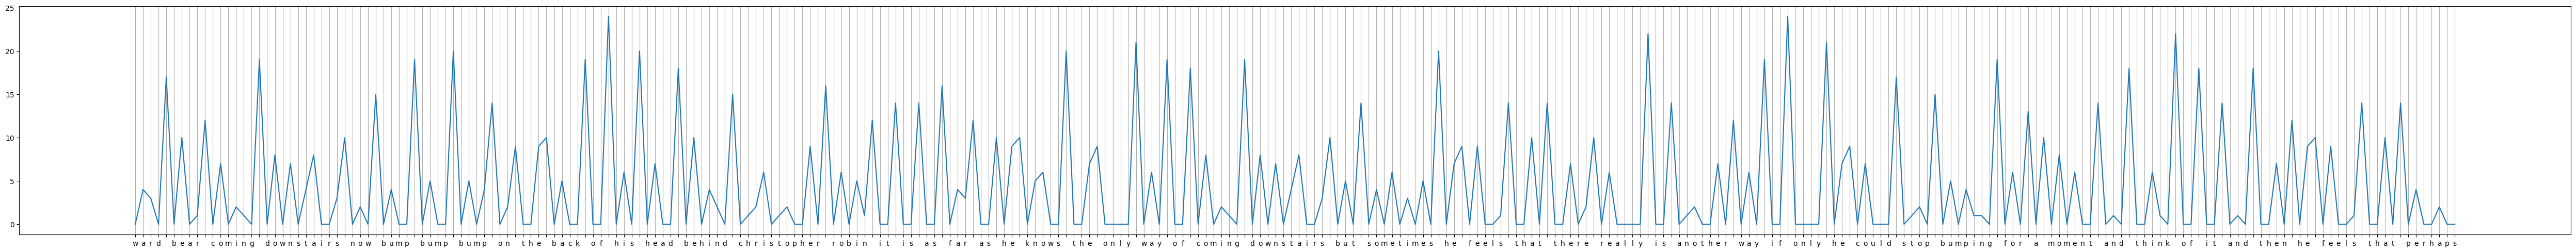

In [75]:
begin = 100
length = 400

arr_TF = np.array(TF, dtype=float)

arr_TF = np.pad(arr_TF, (1, 0))[:-1] - arr_TF
arr_TF[arr_TF > 0] = 0
arr_TF = np.abs(arr_TF)

arr_TF = arr_TF[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(arr_TF.size), arr_TF)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])) ,input_str[begin:length])
axs.xaxis.grid(True)

plt.show()

In [76]:
# train
max_index_L1 = 4

index_by_prev_L1: dict[str, dict] = {}
StatsDict_L1: dict[str, dict] = {}

StatsDict, index_by_prev_L1 = predict_train(letters=letters, input_str=input_str, max_index=max_index_L1)

ValueError: too many values to unpack (expected 2)

In [ ]:
from collections import Counter


def predict(input_str, TF: list, StatsDict: dict, index_by_prev: dict, max_index, err=0,):
    indexes = [x for x in range(1, max_index+1)]

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            continue

        all_indexes_prd_symbols = Counter({})
        prd_symbols_per_index = []

        for index in indexes:
            stats_key = inp + str(index)
            prd_symbols = StatsDict.get(stats_key)

            if not prd_symbols:
                print(f'not prd_symbol: {inp=} {index=} {prd_symbols=}')
                continue

            print(f'{inp=} {index=} {prd_symbols=}')
            all_indexes_prd_symbols += Counter(prd_symbols)
            prd_symbols_per_index.append(prd_symbols)

        print(f'{all_indexes_prd_symbols=}')
        stl = np.array(list(all_indexes_prd_symbols.values()))
        # tf = len(list(all_indexes_prd_symbols.keys()))
        tf = np.sum(np.abs(stl - stl[np.newaxis].T))

        TF.append(tf)

        prd_symbol = max(all_indexes_prd_symbols, key=all_indexes_prd_symbols.get)
        prd_symbol_stats = all_indexes_prd_symbols[prd_symbol]

        next_inp = input_str[inp_idx + 1]
        print(f'{inp_idx=} {inp=} | {prd_symbol=} {next_inp=} {prd_symbol_stats=}')

        if prd_symbol != next_inp:
            err += 1

        output.append(prd_symbol)

        prev_indexes = []
        for idx, prd_symbols in enumerate(prd_symbols_per_index):
            if prd_symbols.__contains__(next_inp):
                prev_indexes.append(idx + 1)

        print(f'{prev_indexes=}')

        # recurtion
        indexes = []
        for prev_index in prev_indexes:
            by_prev_key = inp + str(prev_index) + ':' + next_inp
            next_index = index_by_prev.get(by_prev_key)

            if not next_index:
                continue
            
            print(f'{next_index}')
            indexes.extend(list(next_index.keys()))

        indexes = list(set(indexes))
        print('next indexes', indexes)
        
        if len(indexes) <= 0:
            indexes = [x for x in range(1, max_index+1)]

        print()
        
    output.insert(0, input_str[0])

    return TF, err, output


In [ ]:
# predict
TF = []

TF, err, out_L1 = predict(input_str=input_str, TF=TF, StatsDict=StatsDict, index_by_prev=index_by_prev_L1, max_index=max_index_L1)

print(err, err / (len(input_str) / 100) )

not prd_symbol: inp='c' index=1 prd_symbols=None
not prd_symbol: inp='c' index=2 prd_symbols=None
not prd_symbol: inp='c' index=3 prd_symbols=None
not prd_symbol: inp='c' index=4 prd_symbols=None
all_indexes_prd_symbols=Counter()


ValueError: max() arg is an empty sequence